In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In /home/qzhang/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/qzhang/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/qzhang/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/qzhang/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/qzhang/anaconda3/lib/python3.7/site-packages/matplo

Details of three datasets:
- **original dataset**
> which contains 3000 2duv, la and cd of 3 labels(1000 a-helix,1000 b-sheet and 1000 other-SS) harvested from molecular dynamics trajectories of natural protein proteins
bovine deoxyhemoglobin (PDB ID: 1HDA) and lentil lectin (PDB ID: 1LES)
 - twoduv (3000)
 - la (3000)
 - cd (3000)
- **homologous dataset**
> which contains 1500 la,cd,2duv 3 labels(500 a-helix,500 b-sheet and 500 other-SS) harvested from human deoxyhemoglobin(PDB ID:1A3N) and pea lectin (PDB ID: 1BQP)
 - 2duv (1500)
 - la (1500)
 - cd (1500)
- **non-homologous dataset**
> which contains 1500 la,cd,2duv harvested from 498 other proteins
 - twoduv (1500)
 - la (1500)
 - cd (1500)　

In [4]:
# load_data
original_2duv = np.load('/data1/qzhang/2duv_small/original/original_dataset.npz')['twoduv']
original_la = np.load('/data1/qzhang/2duv_small/original/original_dataset.npz')['la']
original_cd = np.load('/data1/qzhang/2duv_small/original/original_dataset.npz')['cd']
original_labels = np.load('/data1/qzhang/2duv_small/original/original_dataset.npz')['labels']

# oever view
print('Original 2duv shape:',original_2duv.shape)
print('Original LA/CD shape:',original_la.shape)
print('labels:',np.unique(original_labels))

Original 2duv shape: (3000, 25921)
Original LA/CD shape: (3000, 3000)
labels: ['a-helix' 'b-sheet' 'other-SS']


helix


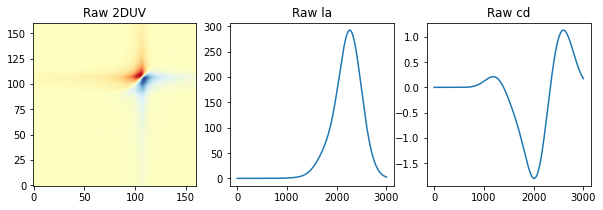

sheet


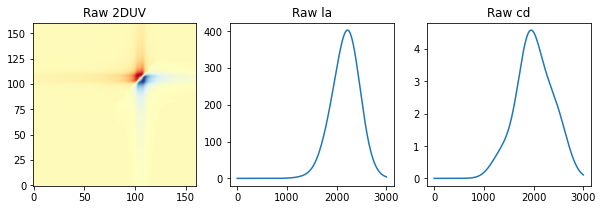

other


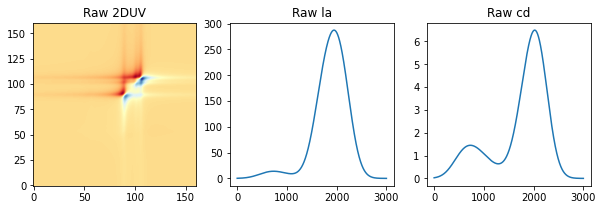

In [15]:
# plot raw data


index_image = {'helix':0,'sheet':500,'other':1000} # a-helix , b-sheet ,other-ss


cmap = 'RdYlBu_r'
for stru_name,n_image in index_image.items():
    
    print(stru_name)
    plt.figure(figsize=(10,3))

    plt.subplot(1,3,1)
    plt.imshow(original_2duv[n_image].reshape(161,161),origin='lower',cmap=cmap)
#     plt.axis('off')
    plt.title('Raw 2DUV')

    plt.subplot(1,3,2)
    plt.plot(original_la[n_image])
#     plt.axis('off')
    plt.title('Raw la')

    plt.subplot(1,3,3)
    plt.plot(original_cd[n_image])
#     plt.axis('off')
    plt.title('Raw cd')


    plt.show()

In [17]:

# preprocess

# 2duv
mean = original_2duv.mean()
std = original_2duv.std()

original_2duv -=mean
original_2duv/= std

original_2duv = original_2duv.clip(-2,2)


# la/cd
from sklearn.preprocessing import minmax_scale
original_la = minmax_scale(original_la, axis=1)
original_cd = minmax_scale(original_cd, axis=1)

/home/qzhang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [18]:
print(original_2duv.min(),original_2duv.max())
print(original_la.min(),original_la.max())


-2.0 2.0
0.0 1.0000000000000002


helix


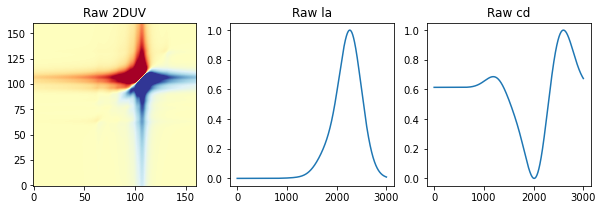

sheet


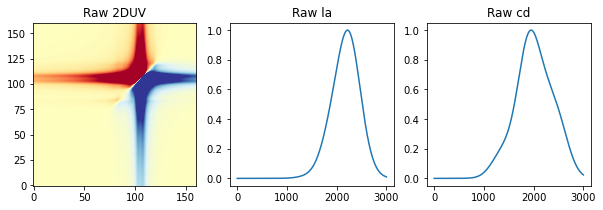

other


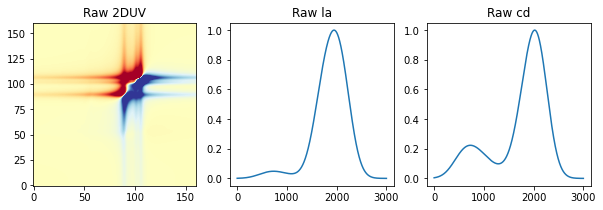

In [19]:
# plot normalized data



index_image = {'helix':0,'sheet':500,'other':1000} # a-helix , b-sheet ,other-ss


cmap = 'RdYlBu_r'
for stru_name,n_image in index_image.items():
    
    print(stru_name)
    plt.figure(figsize=(10,3))

    plt.subplot(1,3,1)
    plt.imshow(original_2duv[n_image].reshape(161,161),origin='lower',cmap=cmap,vmin=-2,vmax=2)
#     plt.axis('off')
    plt.title('Raw 2DUV')

    plt.subplot(1,3,2)
    plt.plot(original_la[n_image])
#     plt.axis('off')
    plt.title('Raw la')

    plt.subplot(1,3,3)
    plt.plot(original_cd[n_image])
#     plt.axis('off')
    plt.title('Raw cd')


    plt.show()